<a href="https://colab.research.google.com/github/Sereenamariyam/Data-Analysis/blob/main/Points_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Path to your Excel file
file_path = '/content/eurovision_1998 to 2012.xlsx'

# Load Sheet1 into df1
df1 = pd.read_excel(file_path, sheet_name='eurovision_meta')

# Load Sheet2 into df2
df2 = pd.read_excel(file_path, sheet_name='Voting Final')

# Print the shape of each DataFrame to confirm loading
print("Sheet1 shape:", df1.shape)
print("Sheet2 shape:", df2.shape)

Sheet1 shape: (648, 30)
Sheet2 shape: (12131, 4)


In [2]:
import pandas as pd

# Load the Excel sheets
file_path = '/content/eurovision_1998 to 2012.xlsx'  # If you still have separate sheets, use the original Excel file instead
# For demonstration, let's assume you have the original file:

# Read Sheet1 and Sheet2 from the original file
df1 = pd.read_excel(file_path, sheet_name='eurovision_meta')
df2 = pd.read_excel(file_path, sheet_name='Voting Final')

# Merge the two DataFrames on both 'Year' and 'Country'
merged_df = pd.merge(df1, df2, on=['Year', 'Country'], how='inner')  # Use 'outer', 'left', or 'right' as needed

# Print the merged DataFrame (optional)
print(merged_df.head())

# Save the merged DataFrame to a new Excel file (optional)
merged_df.to_excel('/content/merged_on_year.xlsx', index=False)

   Unnamed: 0  Year    Country                 Region      Artist  Song  \
0           1  2009  Lithuania  Former Socialist Bloc  Sasha Son   Love   
1           1  2009  Lithuania  Former Socialist Bloc  Sasha Son   Love   
2           1  2009  Lithuania  Former Socialist Bloc  Sasha Son   Love   
3           1  2009  Lithuania  Former Socialist Bloc  Sasha Son   Love   
4           1  2009  Lithuania  Former Socialist Bloc  Sasha Son   Love   

  Artist.gender Group.Solo  Place  Points  ... speechiness  key  liveness  \
0          Male       Solo     23      23  ...    0.027817  9.0  0.078643   
1          Male       Solo     23      23  ...    0.027817  9.0  0.078643   
2          Male       Solo     23      23  ...    0.027817  9.0  0.078643   
3          Male       Solo     23      23  ...    0.027817  9.0  0.078643   
4          Male       Solo     23      23  ...    0.027817  9.0  0.078643   

   time_signature  mode  loudness   valence  Happiness       Giver  Score  
0         

In [3]:
# If you already have merged_df in memory, use this:
print("Missing values in each column:")
print(merged_df.isnull().sum())

print("\nTotal missing values in the DataFrame:", merged_df.isnull().sum().sum())

# (Optional) Print rows with any missing values
print("\nRows with any missing values:")
print(merged_df[merged_df.isnull().any(axis=1)])

Missing values in each column:
Unnamed: 0               0
Year                     0
Country                  0
Region                   0
Artist                   0
Song                     0
Artist.gender         8518
Group.Solo            8518
Place                    0
Points                   0
Home.Away.Country        0
Home.Away.Region         0
Is.Final                 0
Semi.Final.Number    11684
Song.In.English          0
Song.Quality             0
Normalized.Points        0
energy                3913
duration              3913
acousticness          3989
danceability          3913
tempo                 3913
speechiness           3913
key                   3913
liveness              3913
time_signature        3913
mode                  3913
loudness              3913
valence               3989
Happiness             6647
Giver                    0
Score                    0
dtype: int64

Total missing values in the DataFrame: 82475

Rows with any missing values:
       Unnamed:

In [4]:
# For categorical columns, fill missing with mode
merged_df['Artist.gender'] = merged_df['Artist.gender'].fillna(merged_df['Artist.gender'].mode()[0])
merged_df['Group.Solo'] = merged_df['Group.Solo'].fillna(merged_df['Group.Solo'].mode()[0])

# For columns that are integer and categorical (like Semi.Final.Number and mode), use mode
merged_df['Semi.Final.Number'] = merged_df['Semi.Final.Number'].fillna(merged_df['Semi.Final.Number'].mode()[0])
merged_df['mode'] = merged_df['mode'].fillna(merged_df['mode'].mode()[0])

# For integer/numeric columns, fill missing with mean (or median if preferred)
num_cols = [
    'energy', 'duration', 'acousticness', 'danceability', 'tempo', 'speechiness',
    'key', 'liveness', 'time_signature', 'loudness', 'valence', 'Happiness'
]

for col in num_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mean())

# **Justification**

Categorical columns (Artist.gender, Group.Solo): Filled with the most frequent value (mode).

Semi.Final.Number only takes integer values, specifically 1 or 2, representing which semi-final a country performed in.
These numbers are categorical labels rather than continuous numeric data, even though they're stored as integers so i used mode.
mode column (with values 0 and 1) , the missing values are handled with mode method since they are also categorical.


Numerical columns: Filled with the mean value of each column.
 `energy` is a continuous numerical feature, and its missing values can be reasonably approximated by the average value.

In [5]:
print("Missing values in each column:")
print(merged_df.isnull().sum())

print("\nTotal missing values in the DataFrame:", merged_df.isnull().sum().sum())

Missing values in each column:
Unnamed: 0           0
Year                 0
Country              0
Region               0
Artist               0
Song                 0
Artist.gender        0
Group.Solo           0
Place                0
Points               0
Home.Away.Country    0
Home.Away.Region     0
Is.Final             0
Semi.Final.Number    0
Song.In.English      0
Song.Quality         0
Normalized.Points    0
energy               0
duration             0
acousticness         0
danceability         0
tempo                0
speechiness          0
key                  0
liveness             0
time_signature       0
mode                 0
loudness             0
valence              0
Happiness            0
Giver                0
Score                0
dtype: int64

Total missing values in the DataFrame: 0


In [6]:
# Print unique values for 'mode' column
print("Unique values in 'mode' column:", merged_df['mode'].unique())

# Print unique values for 'Semi.Final.Number' column
print("Unique values in 'Semi.Final.Number' column:", merged_df['Semi.Final.Number'].unique())

Unique values in 'mode' column: [0. 1.]
Unique values in 'Semi.Final.Number' column: [1. 2.]


In [7]:
merged_df.describe()

,Unnamed: 0,Year,Place,Points,Is.Final,Semi.Final.Number,Song.In.English,Song.Quality,Normalized.Points,energy,...,tempo,speechiness,key,liveness,time_signature,mode,loudness,valence,Happiness,Score
count,16998.00000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,...,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000,16998.000000
mean,281.71126,2006.896517,10.533710,93.723673,0.687375,1.122426,0.767031,3.070121,0.052284,0.719114,...,113.340641,0.052459,5.769736,0.194369,3.898510,0.675668,-6.572258,0.513905,5.407799,2.530592
std,187.04638,3.918111,7.038377,66.169183,0.463577,0.327787,0.422735,2.184153,0.036274,0.163229,...,21.410256,0.035769,3.086382,0.148176,0.436146,0.468139,2.106433,0.206929,0.223662,3.626480
min,1.00000,1998.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-0.363663,0.000000,0.064730,...,64.971000,0.023994,0.000000,0.026513,1.000000,0.000000,-21.878000,0.017786,4.375630,0.000000
25%,111.00000,2004.000000,5.000000,44.000000,0.000000,1.000000,1.000000,1.261523,0.021757,0.663860,...,100.060000,0.034342,4.000000,0.100364,3.898510,0.000000,-6.974000,0.397708,5.379855,0.000000
50%,281.50000,2008.000000,9.000000,81.000000,1.000000,1.000000,1.000000,2.738873,0.048408,0.719114,...,113.340641,0.047692,5.769736,0.171194,4.000000,1.000000,-6.572258,0.513905,5.407799,0.000000
75%,421.00000,2010.000000,16.000000,134.000000,1.000000,1.000000,1.000000,4.453836,0.074963,0.846970,...,127.858000,0.052459,8.000000,0.194369,4.000000,1.000000,-5.264000,0.674176,5.502692,5.000000
max,648.00000,2012.000000,26.000000,387.000000,1.000000,2.000000,1.000000,9.795199,0.158867,0.985500,...,211.354000,0.408260,11.000000,0.987510,7.000000,1.000000,-2.352000,0.971989,6.148232,12.000000


# **Intelligent Feature Selection**

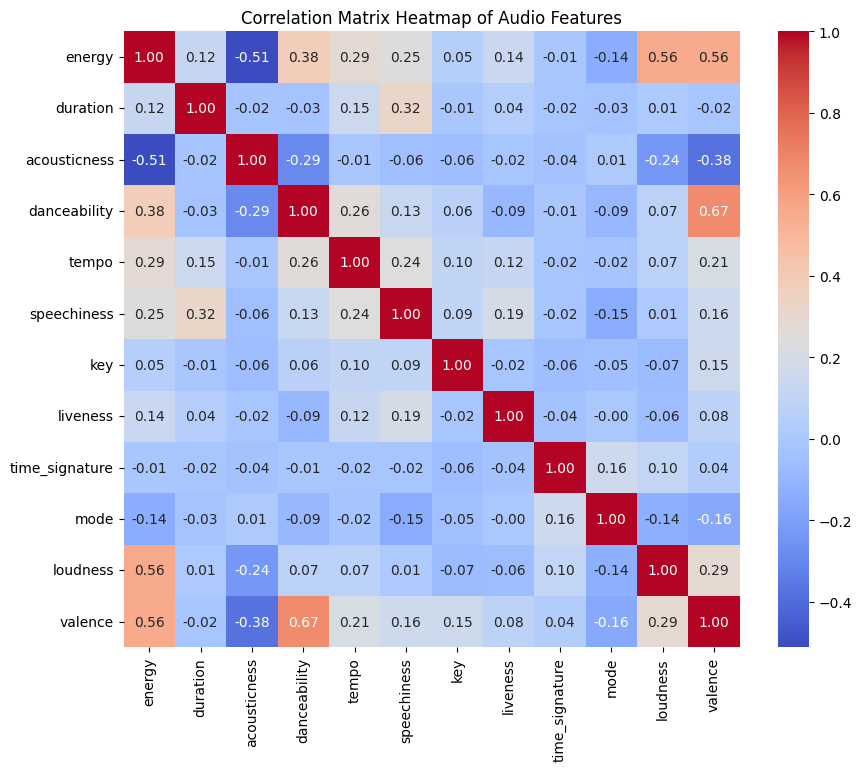

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric audio features
audio_features = [
    'energy', 'duration', 'acousticness', 'danceability', 'tempo', 'speechiness',
    'key', 'liveness', 'time_signature', 'mode', 'loudness', 'valence'
]

# Assuming your DataFrame is named merged_df
corr = merged_df[audio_features].corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap of Audio Features')
plt.show()

Based on the correlation matrix heatmap, the following features were selected: **acousticness, loudness, tempo, speechiness, valence**. These choices minimize multicollinearity
### **Justification:**

- **acousticness**:  
  - Shows low to moderate correlation with other selected features:
  - Its highest correlation is with valence (-0.38), which is moderate and negative, indicating these features provide relatively distinct information.

- **loudness**:  
  - Moderately correlated with valence (**0.29**),
  - While moderately correlated with energy (**0.56**), **energy** was not selected, reducing redundancy.

- **tempo**:  
  - Shows very low correlation with all other selected features:

  - This makes it a valuable, independent contributor to the feature set.

- **speechiness**:  
  - Has lcorrelation with other selected features:
    - With acousticness: **-0.06**
    - With loudness: **0.19**
    - With tempo: **0.07**
    - With valence: **0.16**
  - Adds unique information related to the presence of spoken words.

- **valence**:  
  - Measures musical positiveness; moderately correlated with loudness (**0.29**) and acousticness (**-0.38**), but neither value is high enough to cause significant multicollinearity.
  
*Why Other Features Were Discarded**
- **energy**: Discarded due to moderate correlations with both loudness (**0.56**) and valence (**0.56**), which could lead to multicollinearity if included.
- **danceability**: Discarded as it is not a pure audio feature and is highly correlated with valence (**0.67**).
- **duration, key, liveness, time_signature, mode**: Discarded due to low relevance and weak correlations with most other features, providing little additional predictive power.


**Exploratory Data Analysis**

Workflow: Using your selected features, create a scatter plot to visualize the relationship between danceability and Points. Analytical Question: Based on your plot, what is the apparent relationship between how danceable a song is and the points it receives? Formulate a brief hypothesis. Screenshot Requirement: Upload a screenshot showing the generated scatter plot and the markdown cell containing your hypothesis.

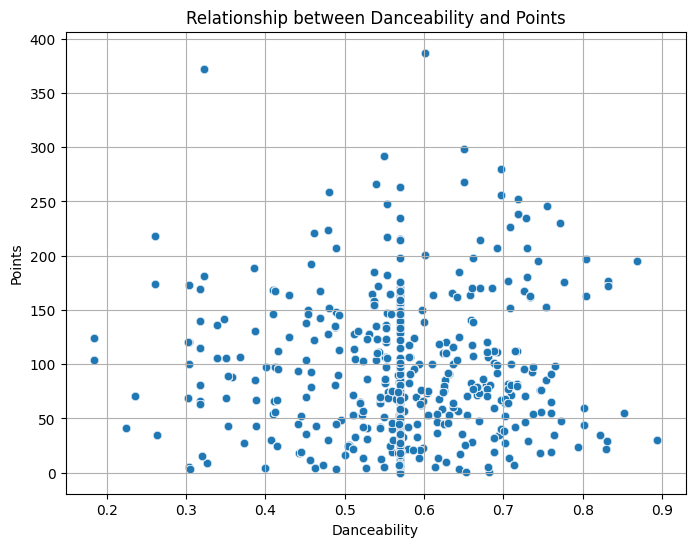

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named merged_df

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='danceability', y='Points', alpha=0.7)
plt.title('Relationship between Danceability and Points')
plt.xlabel('Danceability')
plt.ylabel('Points')
plt.grid(True)
plt.show()

## Relationship Between Danceability and Points

Based on the scatter plot, there does not appear to be a strong or clear relationship between how danceable a song is and the points it receives. The data points are widely dispersed across all levels of danceability, and songs with both low and high danceability scores receive a wide range of points.

The distribution of points is scattered across the entire range of danceability values (0.2 to 0.9). There is no upward or downward trend.
This suggests that danceability alone is not a strong predictor of the points a song.
There is no apparent linear relationship between danceability and points.
Values between **0.5 and 0.6**, we observe that, large concentration of songs falls within this range of danceability. Yet,There is no clear trend or pattern indicating that songs with danceability between 0.5 and 0.6 consistently receive higher or lower points compared to other ranges.

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select features of interest
features = ['acousticness', 'loudness', 'tempo', 'speechiness', 'valence']
df = merged_df.copy()  # Use your actual DataFrame

# Remove outliers using IQR
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Reset index after outlier removal
df.reset_index(drop=True, inplace=True)


In [12]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Now df_scaled contains the cleaned and scaled features

# Model Training and Evaluation

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Assume df_no_outliers is your DataFrame after outlier removal and scaling
features = ['acousticness', 'loudness', 'tempo', 'speechiness', 'valence']
target = 'Points'

X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 34.43


In [15]:
import pickle

# Save the model to a pickle file
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gbr, f)

print("Model saved as 'gradient_boosting_model.pkl'")


Model saved as 'gradient_boosting_model.pkl'
